In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [ ]:
data = pd.read_csv('/content/green house gases.zip')

In [ ]:
data

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [ ]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


(308, 11)

In [ ]:
data.isna().sum()

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

In [ ]:
data.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


In [ ]:
data.corr()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.025789,-0.145345,0.985379,0.910563,0.994850,0.460965,0.870067,0.022353,-0.361884,0.755731
Month,-0.025789,1.000000,-0.016345,-0.096287,0.017558,0.012395,-0.014914,-0.001084,-0.032754,0.014845,-0.098016
MEI,-0.145345,-0.016345,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,0.985379,-0.096287,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
CH4,0.910563,0.017558,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,0.994850,0.012395,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC-11,0.460965,-0.014914,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC-12,0.870067,-0.001084,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,0.022353,-0.032754,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,-0.361884,0.014845,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069


In [ ]:
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [ ]:
data.dtypes

Year          int64
Month         int64
MEI         float64
CO2         float64
CH4         float64
N2O         float64
CFC-11      float64
CFC-12      float64
TSI         float64
Aerosols    float64
Temp        float64
dtype: object

In [ ]:
print(data.nunique())

Year         26
Month        12
MEI         294
CO2         298
CH4         303
N2O         304
CFC-11      307
CFC-12      307
TSI         302
Aerosols    155
Temp        242
dtype: int64


<Axes: >

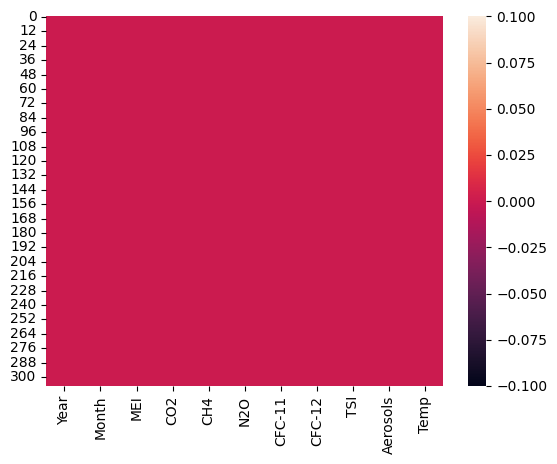

In [ ]:
sns.heatmap(data.isnull())

<Axes: >

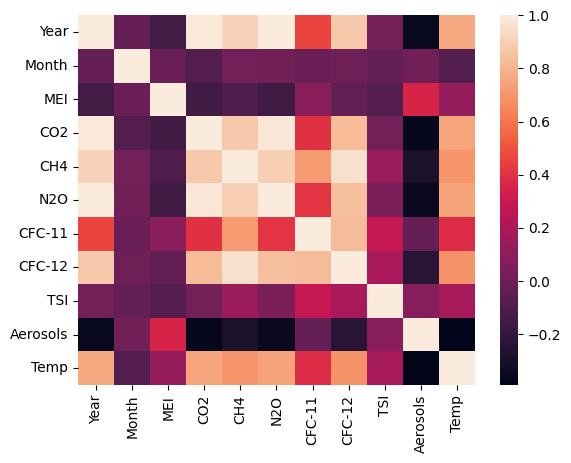

In [ ]:
sns.heatmap(data.corr())

<Axes: >

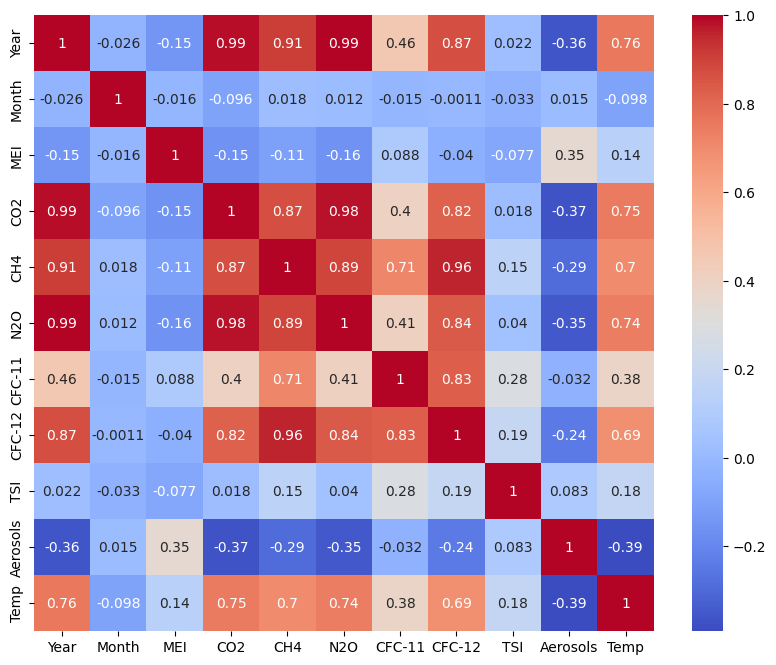

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot= True, cmap='coolwarm')

<Axes: xlabel='Aerosols', ylabel='Temp'>

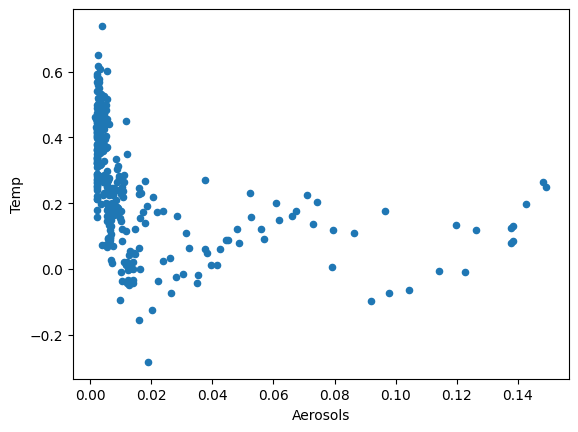

In [ ]:
data.plot(kind="scatter",x="Aerosols",y="Temp")

<Axes: xlabel='Year', ylabel='Temp'>

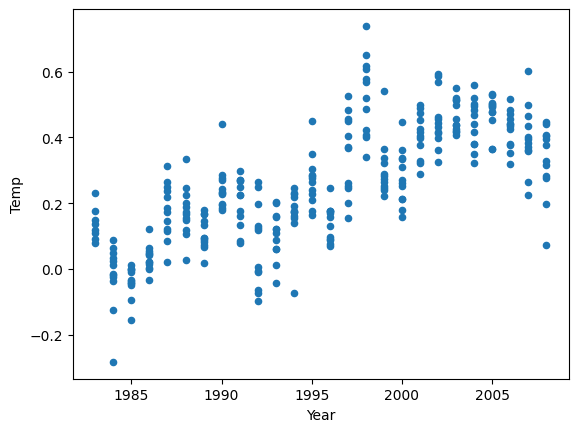

In [ ]:
data.plot(kind="scatter",x="Year",y="Temp")


<Axes: xlabel='Month', ylabel='Temp'>

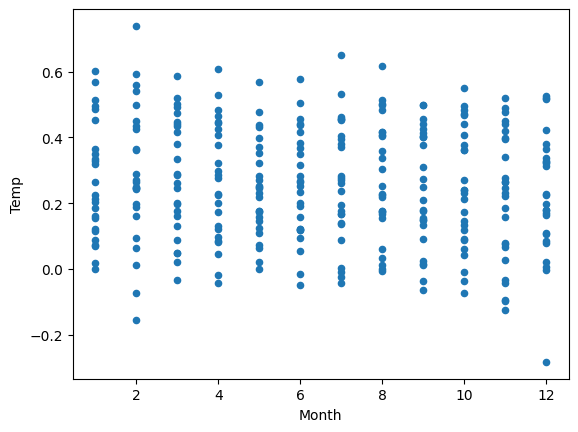

In [ ]:
data.plot(kind="scatter",x="Month",y="Temp")

<Axes: xlabel='MEI', ylabel='Temp'>

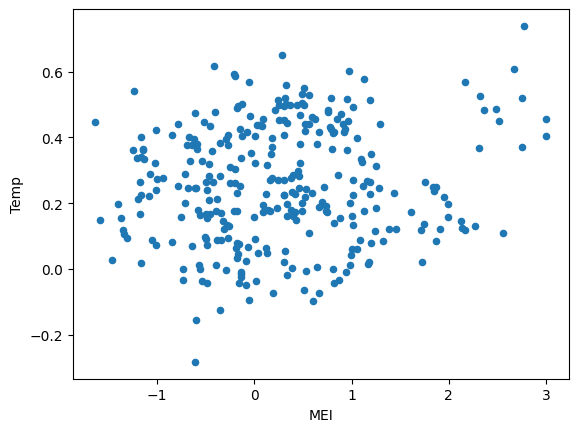

In [ ]:
data.plot(kind="scatter",x="MEI",y="Temp")

<Axes: xlabel='CO2', ylabel='Temp'>

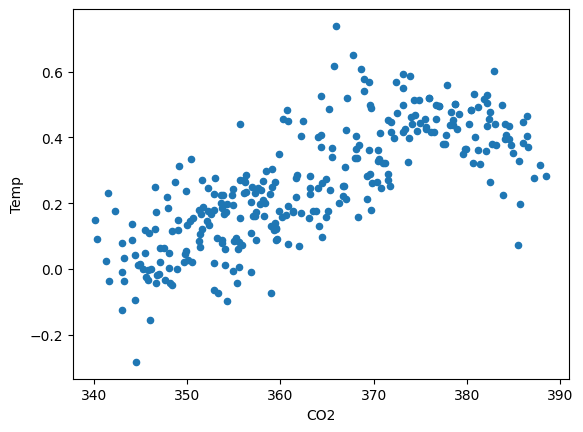

In [ ]:
data.plot(kind="scatter",x="CO2",y="Temp")

<Axes: xlabel='CH4', ylabel='Temp'>

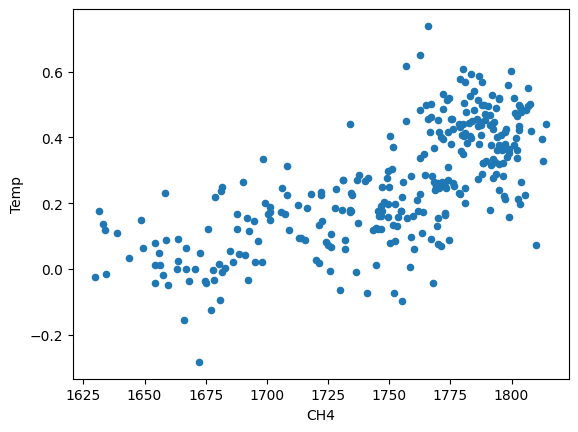

In [ ]:
data.plot(kind="scatter",x="CH4",y="Temp")

<Axes: xlabel='N2O', ylabel='Temp'>

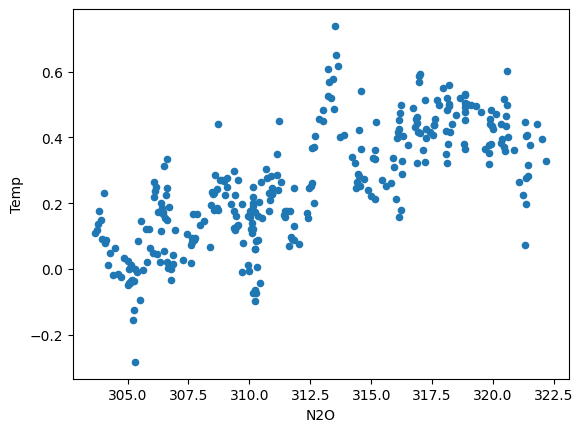

In [ ]:
data.plot(kind="scatter",x="N2O",y="Temp")

<Axes: xlabel='CFC-11', ylabel='Temp'>

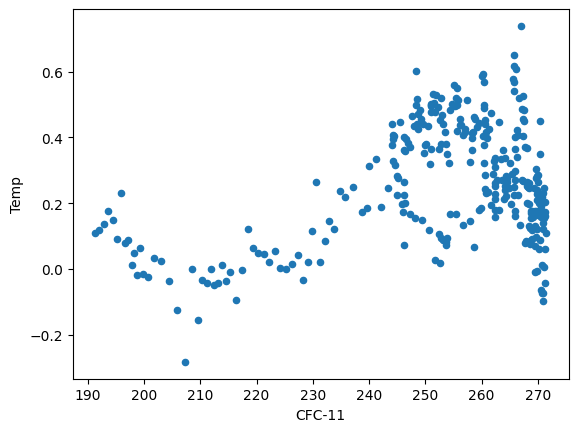

In [ ]:
data.plot(kind="scatter",x="CFC-11",y="Temp")

<Axes: xlabel='CFC-12', ylabel='Temp'>

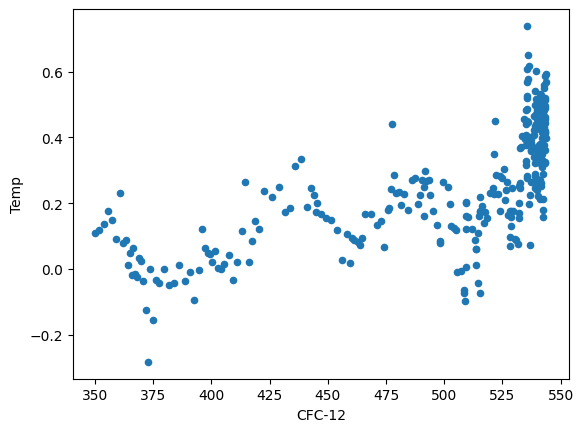

In [ ]:
data.plot(kind="scatter",x="CFC-12",y="Temp")

<Axes: xlabel='TSI', ylabel='Temp'>

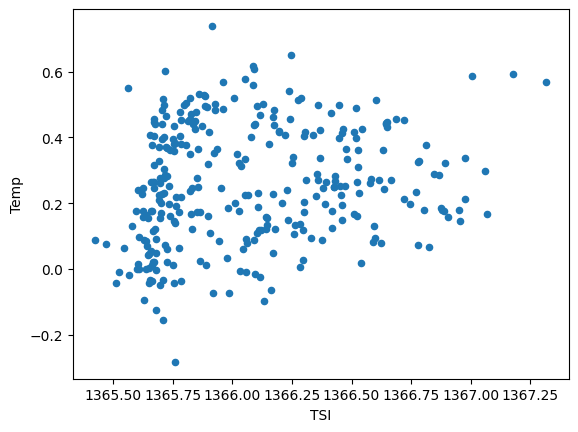

In [ ]:
data.plot(kind="scatter",x="TSI",y="Temp")

In [ ]:
corr = data.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[12:24:2]

N2O   Year      0.994850
Year  CO2       0.985379
CO2   N2O       0.981135
CH4   CFC-12    0.958237
Year  CH4       0.910563
CH4   N2O       0.894409
dtype: float64

In [ ]:
skew_val = data.skew().sort_values(ascending=False)
skew_val

Aerosols    2.980552
TSI         0.716031
MEI         0.539302
CO2         0.178676
N2O         0.145316
Year       -0.003427
Month      -0.020216
Temp       -0.026540
CH4        -0.826661
CFC-12     -1.227724
CFC-11     -1.463739
dtype: float64

In [ ]:
X = data.drop(["Temp"], axis=1)
y = data["Temp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("Support Vector Machine", SVR())
]
results = []

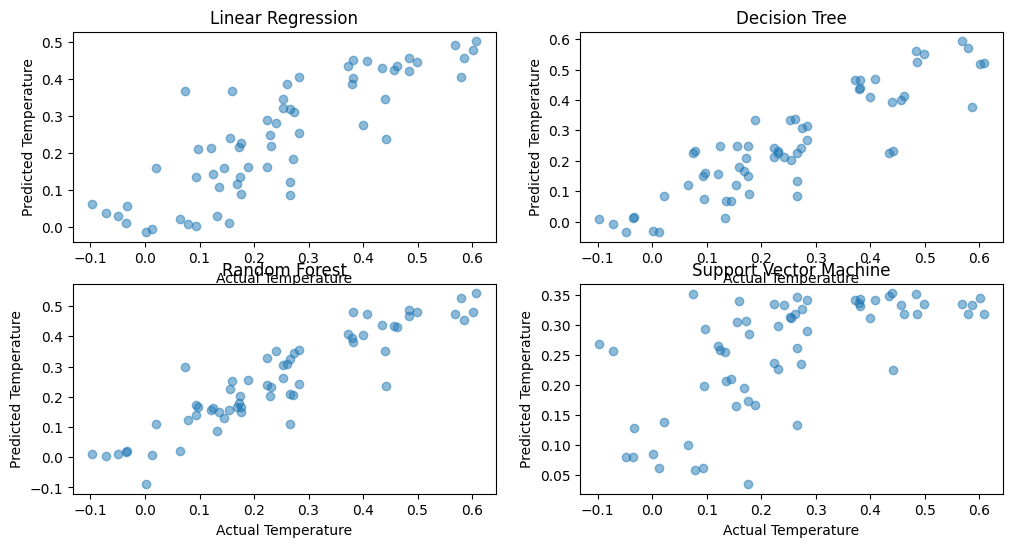

In [ ]:
plt.figure(figsize=(12,6))
for i, (model_name, model) in enumerate(models, 1):
    plt.subplot(2, 2, i)
    scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-scores)
    avg_rmse = rmse_scores.mean()
    results.append((model_name, avg_rmse))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Temperature")
    plt.ylabel("Predicted Temperature")
    plt.title(model_name)


In [ ]:
for model_name, avg_rmse in results:
    print(f"{model_name}: Average RMSE = {avg_rmse:.4f}")
best_model = min(results, key=lambda x: x[1])
print(f"The best model is {best_model[0]} with an average RMSE of {best_model[1]:.4f}")

Linear Regression: Average RMSE = 0.0928
Decision Tree: Average RMSE = 0.1082
Random Forest: Average RMSE = 0.0787
Support Vector Machine: Average RMSE = 0.1279
The best model is Random Forest with an average RMSE of 0.0787


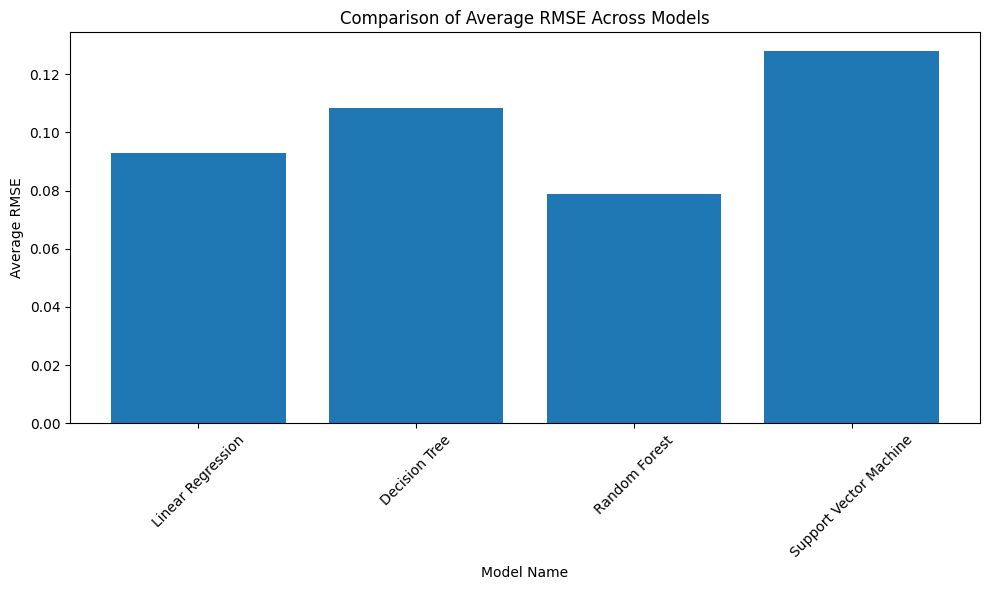

In [ ]:
model_names = [model_name for model_name, _ in results]
avg_rmse_values = [avg_rmse for _, avg_rmse in results]
plt.figure(figsize=(10, 6))
plt.bar(model_names, avg_rmse_values)
plt.xlabel('Model Name')
plt.ylabel('Average RMSE')
plt.title('Comparison of Average RMSE Across Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model_name}: MAE = {mae:.4f}")
best_model = min(mae_dict, key=mae_dict.get)
best_mae = mae_dict[best_model]
print(f"The best model is {best_model} with MAE = {best_mae:.4f}")


Linear Regression: MAE = 0.0787
Decision Tree: MAE = 0.0665
Random Forest: MAE = 0.0557
Support Vector Machine: MAE = 0.1112
The best model is Random Forest with MAE = 0.0557


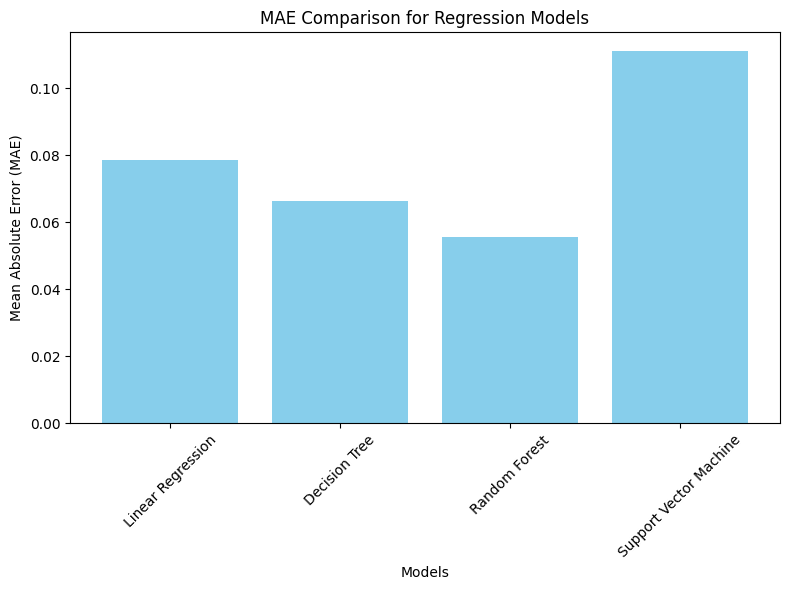

In [ ]:
model_names = []
mae_values = []
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    model_names.append(model_name)
    mae_values.append(mae)
plt.figure(figsize=(8, 6))
plt.bar(model_names, mae_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Comparison for Regression Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

